In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime as dt
import yfinance as yf
import tensorflow

In [3]:
start_date = '2000-01-01'
end_date = '2023-04-1'
df = yf.download('AAPL', start=start_date, end=end_date)
df.head()

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.451065,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.517082,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.896339,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.869431,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.290054,144114400


In [ ]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505280,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516528,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412873,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401019,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800


In [ ]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


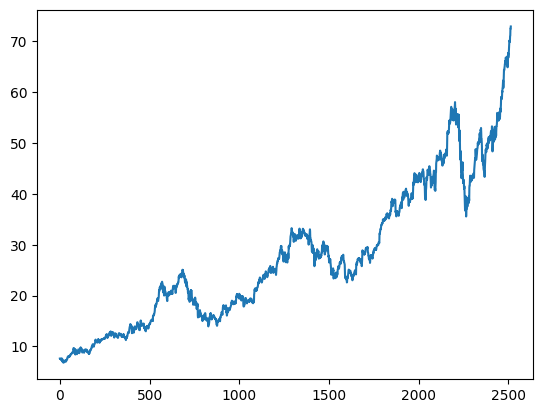

In [ ]:
plt.plot(df.Close)


In [ ]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

In [ ]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

In [ ]:
ma20=df.Close.rolling(20).mean()
ma50=df.Close.rolling(50).mean()


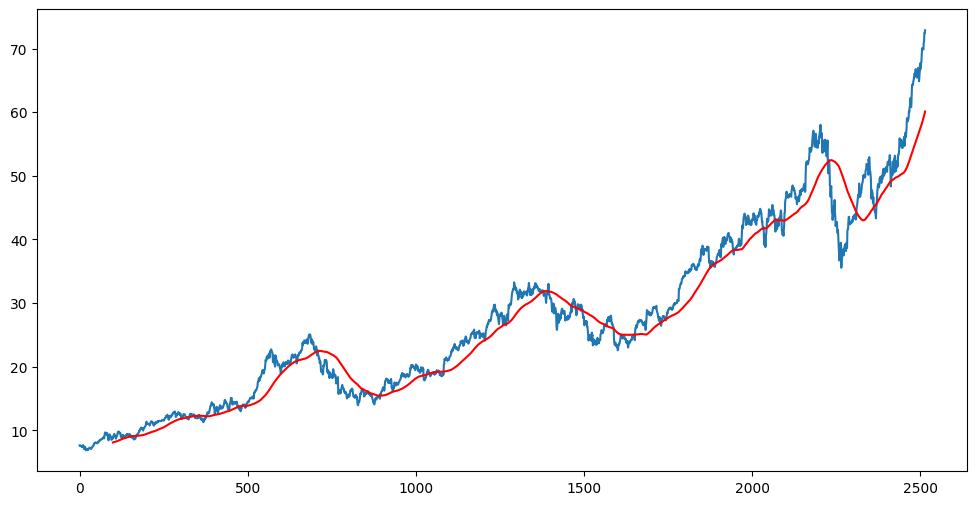

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

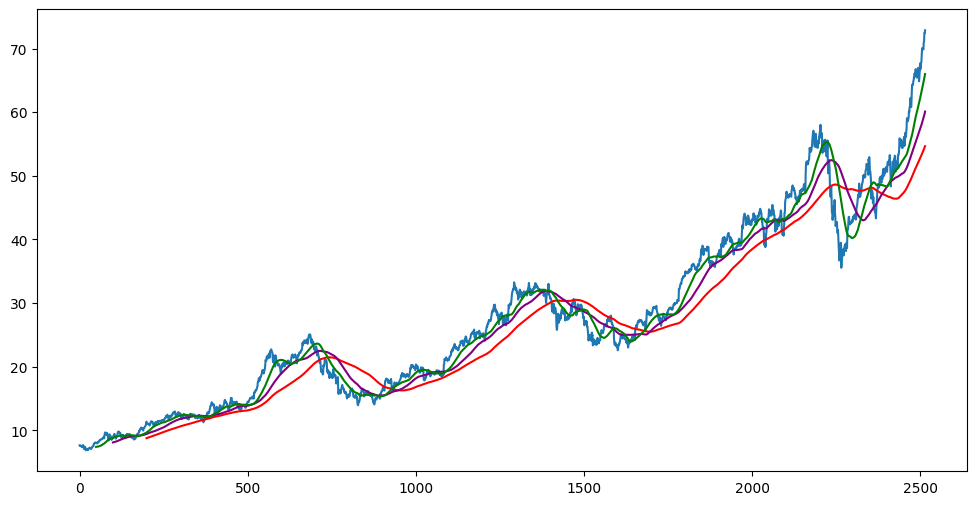

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'red')
plt.plot(ma100,'purple')
plt.plot(ma50,'green')


In [ ]:
df.shape

(2515, 5)

In [ ]:
#Splitting Data into training and testing
data_training = pd.DataFrame (df[ 'Close'][0: int(len(df)*0.70)]) 
data_testing = pd.DataFrame(df['Close'][ int(len (df)*0.70): int(len (df))])
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [ ]:
data_testing.head()


,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [ ]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [ ]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(1760, 1)

In [ ]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])





x_train,y_train=np.array(x_train),np.array(y_train)

# ML Model 

In [ ]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=100)

Epoch 1/50
52/52 [==============================] - 22s 325ms/step - loss: 0.0543
Epoch 2/50
52/52 [==============================] - 17s 329ms/step - loss: 0.0131
Epoch 3/50
52/52 [==============================] - 18s 338ms/step - loss: 0.0114
Epoch 4/50
52/52 [==============================] - 17s 328ms/step - loss: 0.0088
Epoch 5/50
52/52 [==============================] - 17s 334ms/step - loss: 0.0087
Epoch 6/50
52/52 [==============================] - 18s 342ms/step - loss: 0.0083
Epoch 7/50
52/52 [==============================] - 18s 347ms/step - loss: 0.0082
Epoch 8/50
52/52 [==============================] - 17s 334ms/step - loss: 0.0074
Epoch 9/50
52/52 [==============================] - 18s 343ms/step - loss: 0.0088
Epoch 10/50
52/52 [==============================] - 17s 334ms/step - loss: 0.0068
Epoch 11/50
52/52 [==============================] - 17s 336ms/step - loss: 0.0072
Epoch 12/50
52/52 [==============================] - 18s 342ms/step - loss: 0.0069
Epoch 13/50
5

In [ ]:
model.save('keras_model.h5')

In [ ]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [ ]:
data_training.tail(100)

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [ ]:
past_100_days=data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [ ]:
final_df.head

<bound method NDFrame.head of          Close
0    27.092501
1    27.202499
2    27.000000
3    26.982500
4    27.045000
..         ...
850  71.000000
851  71.067497
852  72.477501
853  72.449997
854  72.879997

[855 rows x 1 columns]>

In [ ]:
input_data=scaler.fit_transform(final_df)

In [ ]:
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [ ]:
input_data.shape

(855, 1)

In [ ]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


# Making Pedictions


In [ ]:
y_predicted=model.predict(x_test)

24/24 [==============================] - 2s 70ms/step


In [ ]:
y_predicted.shape

(755, 1)

In [ ]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [ ]:
y_predicted

array([[0.11914763],
       [0.11967644],
       [0.12021494],
       [0.1207509 ],
       [0.12127367],
       [0.12177311],
       [0.12224217],
       [0.12267834],
       [0.12308525],
       [0.12346584],
       [0.12382632],
       [0.12416704],
       [0.12448691],
       [0.12478828],
       [0.12507288],
       [0.12534012],
       [0.12558761],
       [0.12581387],
       [0.12601818],
       [0.12621084],
       [0.12640046],
       [0.1265921 ],
       [0.12678617],
       [0.12698832],
       [0.1272523 ],
       [0.12762174],
       [0.12813576],
       [0.12883075],
       [0.12973855],
       [0.13087952],
       [0.13225906],
       [0.1338687 ],
       [0.13570155],
       [0.13775188],
       [0.14000553],
       [0.14243796],
       [0.14502446],
       [0.14774825],
       [0.1505867 ],
       [0.15350471],
       [0.156463  ],
       [0.15941805],
       [0.1623475 ],
       [0.16522998],
       [0.1679671 ],
       [0.17059296],
       [0.17312661],
       [0.175

In [ ]:
a=scaler.scale_[0]
scale_factor=1/a
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

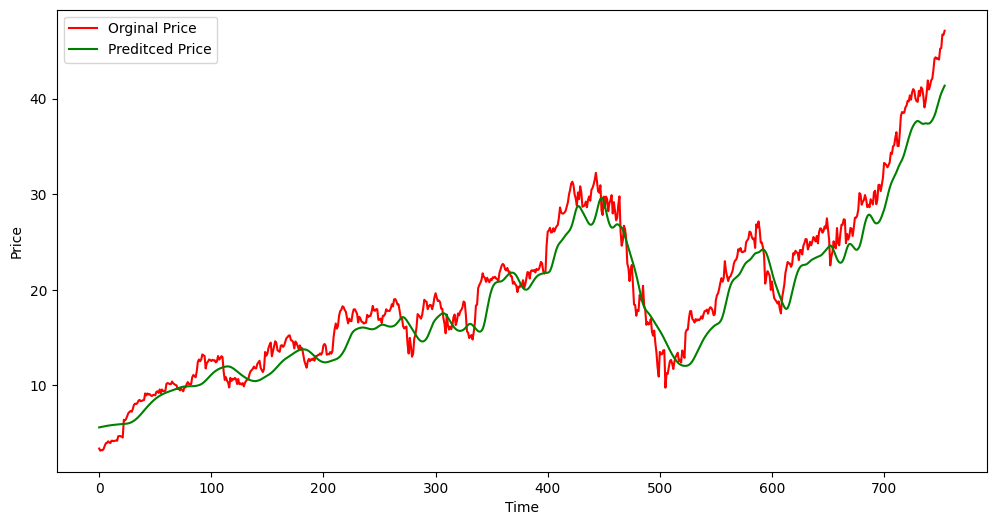

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'r',label='Orginal Price')
plt.plot(y_predicted,'g',label='Preditced Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()